这是用来测试计算Market Access部分的代码

In [7]:
import pandas as pd

# 读取主数据文件（如 WDICSV.csv 或 WDICountry.csv，具体看你的数据结构）
df = pd.read_csv('../data/raw/WDI_CSV_2025_07_02/WDICSV.csv')

# 只保留NY.GDP.MKTP.CD相关数据
gdp_df = df[df['Indicator Code'] == 'NY.GDP.MKTP.CD']

# 可选：筛选年份范围（如2019-2022）
years = [str(y) for y in range(2019, 2023)]
cols = ['Country Name', 'Country Code', 'Indicator Code'] + years
gdp_panel = gdp_df[cols]

# 输出结果
print(gdp_panel)

# 保存为csv
gdp_panel.to_csv('../data/processed/gdp_country_year_2019_2022.csv', index=False)

                          Country Name Country Code  Indicator Code  \
515        Africa Eastern and Southern          AFE  NY.GDP.MKTP.CD   
2031        Africa Western and Central          AFW  NY.GDP.MKTP.CD   
3547                        Arab World          ARB  NY.GDP.MKTP.CD   
5063            Caribbean small states          CSS  NY.GDP.MKTP.CD   
6579    Central Europe and the Baltics          CEB  NY.GDP.MKTP.CD   
...                                ...          ...             ...   
396191           Virgin Islands (U.S.)          VIR  NY.GDP.MKTP.CD   
397707              West Bank and Gaza          PSE  NY.GDP.MKTP.CD   
399223                     Yemen, Rep.          YEM  NY.GDP.MKTP.CD   
400739                          Zambia          ZMB  NY.GDP.MKTP.CD   
402255                        Zimbabwe          ZWE  NY.GDP.MKTP.CD   

                2019          2020          2021          2022  
515     1.009747e+12  9.334072e+11  1.085605e+12  1.191639e+12  
2031    8.332889e

现在需要把表格改成我们希望的结构

In [8]:
import pandas as pd

# 读取数据
df = pd.read_csv('../data/processed/gdp_country_year_2019_2022.csv')

# 只保留NY.GDP.MKTP.CD指标
df = df[df['Indicator Code'] == 'NY.GDP.MKTP.CD']

# 选择需要的年份
years = ['2019', '2020', '2021', '2022']  # 可自定义年份
df_long = df.melt(
    id_vars=['Country Code'],
    value_vars=years,
    var_name='year',
    value_name='gdp'
)

# 重命名列
df_long = df_long.rename(columns={'Country Code': 'iso3'})

# 输出结果
print(df_long.head())
df_long.to_csv('../data/processed/gdp_country_year_2019_2022_cleaned.csv', index=False)

  iso3  year           gdp
0  AFE  2019  1.009747e+12
1  AFW  2019  8.332889e+11
2  ARB  2019  2.949355e+12
3  CSS  2019  6.192930e+10
4  CEB  2019  1.686042e+12


现在来检查一下数据质量

In [4]:
# 读取长表格式的GDP数据
df = pd.read_csv('../data/processed/gdp_country_year_2019_2022_cleaned.csv')

# 查看基本信息
print("数据行数和列数:", df.shape)
print("列名:", df.columns.tolist())
print("前5行:\n", df.head())

# 检查数据类型和基本统计信息
print("\n数据类型和统计信息:")
df.info()
display(df['gdp'].describe())

# 检查缺失值
print("\n每列缺失值数量:")
display(df.isnull().sum())

# 检查iso3是否有重复（同一年同国家是否唯一）
dup = df.duplicated(subset=['iso3', 'year'])
display(f"\n重复行数: {dup.sum()}")

# 检查gdp是否有负值或异常
print("\nGDP为负或者极大的行:")
display(df[df['gdp'] <= 0])
display(df.sort_values('gdp', ascending=False).head(5))

数据行数和列数: (1064, 3)
列名: ['iso3', 'year', 'gdp']
前5行:
   iso3  year           gdp
0  AFE  2019  1.009747e+12
1  AFW  2019  8.332889e+11
2  ARB  2019  2.949355e+12
3  CSS  2019  6.192930e+10
4  CEB  2019  1.686042e+12

数据类型和统计信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   iso3    1064 non-null   object 
 1   year    1064 non-null   int64  
 2   gdp     1028 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 25.1+ KB


count    1.028000e+03
mean     3.008484e+12
std      1.025125e+13
min      5.174659e+07
25%      1.029698e+10
50%      6.119920e+10
75%      6.034914e+11
max      1.024349e+14
Name: gdp, dtype: float64


每列缺失值数量:


iso3     0
year     0
gdp     36
dtype: int64

'\n重复行数: 0'


GDP为负或者极大的行:


,iso3,year,gdp


,iso3,year,gdp
846,WLD,2022,1.024349e+14
580,WLD,2021,9.836575e+13
48,WLD,2019,8.849239e+13
314,WLD,2020,8.611657e+13
814,HIC,2022,6.524866e+13


In [ ]:
missing_gdp = df[df['gdp'].isnull()]
print("🔍 缺失 GDP 的记录数:", len(missing_gdp))
# 看看缺失值集中在哪些国家和年份
display(missing_gdp.groupby('iso3')['year'].apply(list).reset_index(name='缺失年份'))


🔍 缺失 GDP 的记录数: 36


,iso3,缺失年份
0,CUB,"[2021, 2022]"
1,ERI,"[2019, 2020, 2021, 2022]"
2,GIB,"[2019, 2020, 2021, 2022]"
3,INX,"[2019, 2020, 2021, 2022]"
4,MAF,"[2020, 2022]"
5,PRK,"[2019, 2020, 2021, 2022]"
6,SSD,"[2019, 2020, 2021, 2022]"
7,VEN,"[2019, 2020, 2021, 2022]"
8,VGB,"[2019, 2020, 2021, 2022]"
9,YEM,"[2019, 2020, 2021, 2022]"


In [6]:
import pandas as pd

# 读取GDP缺失国家列表
missing_gdp = pd.read_csv('../data/processed/gdp_country_year_2019_2022_cleaned.csv')
missing_iso3 = missing_gdp[missing_gdp['gdp'].isnull()]['iso3'].unique()

# 读取migration数据（假设有iso3字段，或origin/destination字段）
migration = pd.read_csv('../data/processed/migration_flow_cleaned.csv')

# 检查这些国家是否在迁移流数据中出现
in_origin = migration['origin'].isin(missing_iso3)
in_dest = migration['destination'].isin(missing_iso3)

# 输出结果
print("GDP缺失国家在migration数据中作为origin出现的有：", migration.loc[in_origin, 'origin'].unique())
print("GDP缺失国家在migration数据中作为destination出现的有：", migration.loc[in_dest, 'destination'].unique())

GDP缺失国家在migration数据中作为origin出现的有： ['ERI' 'SSD' 'VEN' 'YEM']
GDP缺失国家在migration数据中作为destination出现的有： ['ERI' 'SSD' 'VEN' 'YEM']


然后开始整理CEPII数据

In [9]:
import pandas as pd

# 读取CEPII距离数据（根据实际文件格式选择read_excel或read_csv）
df = pd.read_excel('../data/raw/dist_cepii/dist_cepii.xls')  # 或 .csv

# 只保留需要的列
# 一般CEPII数据的国家代码是 iso_o（origin），iso_d（destination），距离是 distw（加权距离）
cols = ['iso_o', 'iso_d', 'distw']
df_dist = df[cols]

# 强制转换distw为数值型，异常值变为NaN
df_dist['distw'] = pd.to_numeric(df_dist['distw'], errors='coerce')

# 输出结果
display(df_dist.dtypes)
display(df_dist.head())

# 保存为CSV文件
df_dist.to_csv('../data/processed/dist_cepii_cleaned.csv', index=False)

C:\Users\cmy\AppData\Local\Temp\ipykernel_26768\81001340.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['distw'] = pd.to_numeric(df_dist['distw'], errors='coerce')


iso_o     object
iso_d     object
distw    float64
dtype: object

,iso_o,iso_d,distw
0,ABW,ABW,25.09354
1,ABW,AFG,13168.22000
2,ABW,AGO,9587.31600
3,ABW,AIA,976.89740
4,ABW,ALB,9091.57600


In [10]:
# 读取整理后的CEPII距离数据
df_dist = pd.read_csv('../data/processed/dist_cepii_cleaned.csv')

# 查看基本信息
print("数据行数和列数:", df_dist.shape)
print("列名:", df_dist.columns.tolist())
print("前5行:\n", df_dist.head())

# 检查缺失值
print("\n每列缺失值数量:")
print(df_dist.isnull().sum())

# 检查是否有重复的国家对
dup = df_dist.duplicated(subset=['iso_o', 'iso_d'])
print(f"\n重复的国家对数量: {dup.sum()}")

# 检查距离的最小值、最大值、分布
print("\n距离统计描述:")
print(df_dist['distw'].describe())

数据行数和列数: (50176, 3)
列名: ['iso_o', 'iso_d', 'distw']
前5行:
   iso_o iso_d        distw
0   ABW   ABW     25.09354
1   ABW   AFG  13168.22000
2   ABW   AGO   9587.31600
3   ABW   AIA    976.89740
4   ABW   ALB   9091.57600

每列缺失值数量:
iso_o       0
iso_d       0
distw    2215
dtype: int64

重复的国家对数量: 0

距离统计描述:
count    47961.000000
mean      8392.728338
std       4670.531315
min          0.995137
25%       4687.852000
50%       8006.123000
75%      11894.690000
max      19781.390000
Name: distw, dtype: float64


对缺失值的细节了解

In [11]:
total = len(df_dist)
missing = df_dist['distw'].isnull().sum()
percent = missing / total * 100
print(f"distw缺失值数量: {missing}")
print(f"总记录数: {total}")
print(f"缺失值占比: {percent:.2f}%")

distw缺失值数量: 2215
总记录数: 50176
缺失值占比: 4.41%


In [12]:
# 找出distw缺失的行
missing_distw = df_dist[df_dist['distw'].isnull()]
print("缺失距离的记录数:", len(missing_distw))
print("缺失距离的前几行:\n", missing_distw.head())

# 查看涉及的国家对
print("\n涉及的origin国家代码:", missing_distw['iso_o'].unique())
print("涉及的destination国家代码:", missing_distw['iso_d'].unique())

# 按origin和destination统计缺失数量
print("\n按origin统计缺失数量:")
print(missing_distw['iso_o'].value_counts())

print("\n按destination统计缺失数量:")
print(missing_distw['iso_d'].value_counts())

# 列出所有涉及的国家代码（去重）
origin_missing = set(missing_distw['iso_o'].unique())
dest_missing = set(missing_distw['iso_d'].unique())
all_missing = origin_missing.union(dest_missing)

print("涉及距离缺失的国家代码（iso3）：")
print(sorted(all_missing))

缺失距离的记录数: 2215
缺失距离的前几行:
     iso_o iso_d  distw
34    ABW   CCK    NaN
47    ABW   CXR    NaN
120   ABW   MAC    NaN
135   ABW   MSR    NaN
156   ABW   PCN    NaN

涉及的origin国家代码: ['ABW' 'AFG' 'AGO' 'AIA' 'ALB' 'AND' 'ANT' 'ARE' 'ARG' 'ARM' 'ATG' 'AUS'
 'AUT' 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR'
 'BLZ' 'BMU' 'BOL' 'BRA' 'BRB' 'BRN' 'BTN' 'BWA' 'CAF' 'CAN' 'CCK' 'CHE'
 'CHL' 'CHN' 'CIV' 'CMR' 'COG' 'COK' 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CXR'
 'CYM' 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM' 'DZA' 'ECU' 'EGY' 'ERI'
 'ESH' 'ESP' 'EST' 'ETH' 'FIN' 'FJI' 'FLK' 'FRA' 'FRO' 'FSM' 'GAB' 'GBR'
 'GEO' 'GHA' 'GIB' 'GIN' 'GLP' 'GMB' 'GNB' 'GNQ' 'GRC' 'GRD' 'GRL' 'GTM'
 'GUF' 'GUY' 'HKG' 'HND' 'HRV' 'HTI' 'HUN' 'IDN' 'IND' 'IRL' 'IRN' 'IRQ'
 'ISL' 'ISR' 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KIR' 'KNA'
 'KOR' 'KWT' 'LAO' 'LBN' 'LBR' 'LBY' 'LCA' 'LKA' 'LSO' 'LTU' 'LUX' 'LVA'
 'MAC' 'MAR' 'MDA' 'MDG' 'MDV' 'MEX' 'MHL' 'MKD' 'MLI' 'MLT' 'MMR' 'MNG'
 'MNP' 'MOZ' 'MRT

现在可以使用这些数据进行市场准入分析了。你可以将GDP数据与迁移流数据结合，或者使用CEPII距离数据来分析不同国家之间的市场接入情况。根据你的研究目标，可以进一步探索这些数据的相关性和影响因素。

In [13]:
import pandas as pd

# 1. 国家代码统一
gdp = pd.read_csv('../data/processed/gdp_country_year_2019_2022_cleaned.csv')
dist = pd.read_csv('../data/processed/dist_cepii_cleaned.csv')
mig = pd.read_csv('../data/processed/migration_flow_cleaned.csv')

gdp_iso3 = set(gdp['iso3'].unique())
dist_iso3 = set(dist['iso_o'].unique()).union(set(dist['iso_d'].unique()))
mig_iso3 = set(mig['origin'].unique()).union(set(mig['destination'].unique()))

print("GDP表国家数:", len(gdp_iso3))
print("距离表国家数:", len(dist_iso3))
print("迁移流表国家数:", len(mig_iso3))
print("三表国家代码是否完全一致:", gdp_iso3 == dist_iso3 == mig_iso3)

# 2. 缺失值处理
print("\nGDP缺失值数量:", gdp['gdp'].isnull().sum())
print("距离缺失值数量:", dist['distw'].isnull().sum())
print("迁移流缺失值数量:", mig.isnull().sum().sum())

# 3. 数据类型正确
print("\nGDP数据类型:", gdp['gdp'].dtype)
print("距离数据类型:", dist['distw'].dtype)

# 4. 无重复行
gdp_dup = gdp.duplicated(subset=['iso3', 'year']).sum()
dist_dup = dist.duplicated(subset=['iso_o', 'iso_d']).sum()
mig_dup = mig.duplicated(subset=['origin', 'destination', 'migration_month']).sum()
print(f"\nGDP表重复行数: {gdp_dup}")
print(f"距离表重复国家对数: {dist_dup}")
print(f"迁移流表重复行数: {mig_dup}")

GDP表国家数: 266
距离表国家数: 224
迁移流表国家数: 180
三表国家代码是否完全一致: False

GDP缺失值数量: 36
距离缺失值数量: 2215
迁移流缺失值数量: 0

GDP数据类型: float64
距离数据类型: float64

GDP表重复行数: 0
距离表重复国家对数: 0
迁移流表重复行数: 0


In [14]:
# ...existing code...

# 输出三表国家代码差异
print("GDP表独有国家:", sorted(gdp_iso3 - dist_iso3 - mig_iso3))
print("距离表独有国家:", sorted(dist_iso3 - gdp_iso3 - mig_iso3))
print("迁移流表独有国家:", sorted(mig_iso3 - gdp_iso3 - dist_iso3))

# 三表共同国家
common_iso3 = gdp_iso3 & dist_iso3 & mig_iso3
print("三表共同国家数:", len(common_iso3))
print("三表共同国家代码:", sorted(common_iso3))
# ...existing code...

GDP表独有国家: ['AFE', 'AFW', 'ARB', 'ASM', 'CEB', 'CHI', 'CSS', 'CUW', 'EAP', 'EAR', 'EAS', 'ECA', 'ECS', 'EMU', 'EUU', 'FCS', 'GUM', 'HIC', 'HPC', 'IBD', 'IBT', 'IDA', 'IDB', 'IDX', 'IMN', 'INX', 'LAC', 'LCN', 'LDC', 'LIC', 'LIE', 'LMC', 'LMY', 'LTE', 'MAF', 'MCO', 'MEA', 'MIC', 'MNA', 'NAC', 'OED', 'OSS', 'PRE', 'PSE', 'PSS', 'PST', 'SAS', 'SSA', 'SSF', 'SST', 'SXM', 'TEA', 'TEC', 'TLA', 'TMN', 'TSA', 'TSS', 'UMC', 'VIR', 'WLD']
距离表独有国家: ['AIA', 'ANT', 'CCK', 'COK', 'CXR', 'ESH', 'FLK', 'GLP', 'GUF', 'MSR', 'MTQ', 'NFK', 'NIU', 'PAL', 'PCN', 'REU', 'ROM', 'SHN', 'SPM', 'TKL', 'TMP', 'WLF', 'YUG', 'ZAR']
迁移流表独有国家: []
三表共同国家数: 172
三表共同国家代码: ['AFG', 'AGO', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CIV', 'CMR', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CYP', 'CZE', 'DEU', 'DJI', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH

In [1]:
import pandas as pd
import numpy as np

# 参数设置
theta = 1.6  # 距离弹性参数，可调整

# 读取数据
gdp = pd.read_csv('../data/processed/gdp_country_year_2019_2022_cleaned.csv')
dist = pd.read_csv('../data/processed/dist_cepii_cleaned.csv')

# 只用三表共同国家
common_iso3 = set(gdp['iso3'].unique()) & set(dist['iso_o'].unique()) & set(dist['iso_d'].unique())
gdp = gdp[gdp['iso3'].isin(common_iso3)].copy()
dist = dist[(dist['iso_o'].isin(common_iso3)) & (dist['iso_d'].isin(common_iso3))].copy()

# 构建 MA 面板
ma_list = []
years = sorted(gdp['year'].unique())
for year in years:
    gdp_year = gdp[gdp['year'] == year].set_index('iso3')['gdp']
    for i in common_iso3:
        # 取所有 j≠i
        others = [j for j in common_iso3 if j != i]
        # 取 i 到 j 的距离
        dist_ij = dist[(dist['iso_o'] == i) & (dist['iso_d'].isin(others))]
        # 合并 GDP
        dist_ij = dist_ij.merge(gdp_year.rename('gdp_j'), left_on='iso_d', right_index=True, how='left')
        # 计算 MA 分子
        dist_ij['ma_term'] = dist_ij['gdp_j'] / (dist_ij['distw'] ** theta)
        # 求和
        ma_value = dist_ij['ma_term'].sum()
        ma_list.append({'iso3': i, 'year': year, 'MA': ma_value})

ma_df = pd.DataFrame(ma_list)
print(ma_df.head())
ma_df.to_csv('../data/processed/market_access_panel.csv', index=False)

  iso3  year            MA
0  DZA  2019  2.180975e+08
1  GBR  2019  3.970049e+08
2  CHN  2019  9.031008e+07
3  ABW  2019  8.598458e+07
4  BLR  2019  2.514742e+08


检验Market Access的结果是否合理

              year            MA
count   796.000000  7.960000e+02
mean   2020.500000  1.625944e+08
std       1.118737  1.679261e+08
min    2019.000000  0.000000e+00
25%    2019.750000  6.648977e+07
50%    2020.500000  1.054174e+08
75%    2021.250000  1.808262e+08
max    2022.000000  1.131320e+09
缺失值数量： iso3    0
year    0
MA      0
dtype: int64
      count          mean           std  min           25%           50%  \
year                                                                       
2019  199.0  1.545445e+08  1.601139e+08  0.0  6.485415e+07  1.030936e+08   
2020  199.0  1.500319e+08  1.573375e+08  0.0  6.216730e+07  9.793916e+07   
2021  199.0  1.709500e+08  1.782545e+08  0.0  7.106843e+07  1.113917e+08   
2022  199.0  1.748512e+08  1.749654e+08  0.0  7.443571e+07  1.201567e+08   

               75%           max  
year                              
2019  1.635803e+08  1.014846e+09  
2020  1.597427e+08  9.997487e+08  
2021  1.852937e+08  1.131320e+09  
2022  1.930042e+08  1

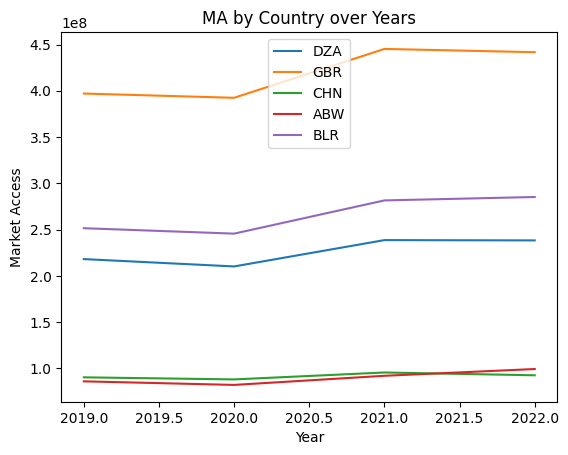

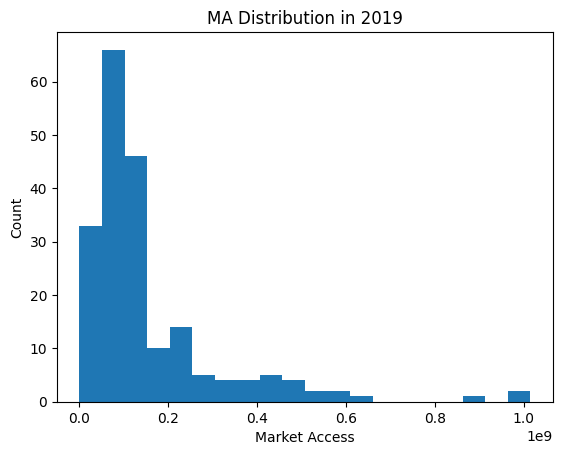

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

ma_df = pd.read_csv('../data/processed/market_access_panel.csv')

# 1. 基本统计
print(ma_df.describe())
print("缺失值数量：", ma_df.isnull().sum())

# 2. 按国家和年份分组
print(ma_df.groupby('year')['MA'].describe())
print(ma_df.groupby('iso3')['MA'].describe())

# 3. 可视化：选几个国家画 MA 随年份变化
sample_countries = ma_df['iso3'].unique()[:5]
for c in sample_countries:
    plt.plot(ma_df[ma_df['iso3'] == c]['year'], ma_df[ma_df['iso3'] == c]['MA'], label=c)
plt.xlabel('Year')
plt.ylabel('Market Access')
plt.title('MA by Country over Years')
plt.legend()
plt.show()

# 4. 某一年 MA 分布直方图
ma_2019 = ma_df[ma_df['year'] == 2019]['MA']
plt.hist(ma_2019, bins=20)
plt.xlabel('Market Access')
plt.ylabel('Count')
plt.title('MA Distribution in 2019')
plt.show()

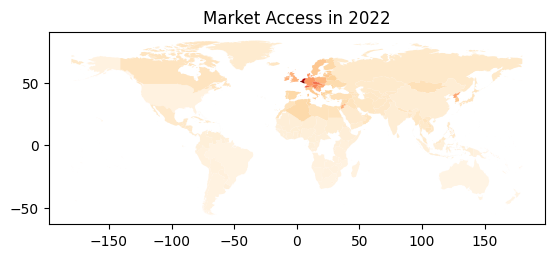

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 推荐用原始字符串 r'' 或双斜杠，避免 Windows 路径 unicode 错误
shp_path = r'E:\UNU-MERIT\Thesis\ClimateMobility\climate-migration-model\data\raw\ne_50m_admin_0_countries\ne_50m_admin_0_countries.shp'
world = gpd.read_file(shp_path)  # Natural Earth
ma = pd.read_csv('../data/processed/market_access_panel.csv')
latest_year = ma['year'].max()
ma_latest = ma[ma['year'] == latest_year]

world = world.merge(ma_latest, left_on='ISO_A3', right_on='iso3', how='left')
world.plot(column='MA', cmap='OrRd', legend=False)
plt.title(f'Market Access in {latest_year}')
plt.show()

In [15]:
import pandas as pd

# MA 与 GDP 的相关性
ma = pd.read_csv(r'../data/processed/market_access_panel.csv')
gdp = pd.read_csv(r'../data/processed/gdp_country_year_2019_2022_cleaned.csv')
merged = ma.merge(gdp, on=['iso3', 'year'])
print("MA 与本国 GDP 的相关性（Pearson）：")
print(merged[['MA', 'gdp']].corr(method='pearson'))
print("MA 与本国 GDP 的相关性（Spearman）：")
print(merged[['MA', 'gdp']].corr(method='spearman'))

# MA 与迁移总流出量的相关性
migration = pd.read_csv(r'../data/processed/migration_flow_cleaned.csv')
migration_total = migration.groupby(['origin', 'year'])['flow'].sum().reset_index()
migration_total.rename(columns={'origin': 'iso3'}, inplace=True)

merged2 = ma.merge(migration_total, on=['iso3', 'year'], how='left')
print("MA 与迁移流出量的相关性（Pearson）：")
print(merged2[['MA', 'flow']].corr(method='pearson'))
print("MA 与迁移流出量的相关性（Spearman）：")
print(merged2[['MA', 'flow']].corr(method='spearman'))

MA 与本国 GDP 的相关性（Pearson）：
           MA       gdp
MA   1.000000  0.015072
gdp  0.015072  1.000000
MA 与本国 GDP 的相关性（Spearman）：
          MA      gdp
MA   1.00000  0.40799
gdp  0.40799  1.00000
MA 与迁移流出量的相关性（Pearson）：
           MA     flow
MA    1.00000 -0.03661
flow -0.03661  1.00000
MA 与迁移流出量的相关性（Spearman）：
            MA      flow
MA    1.000000  0.259666
flow  0.259666  1.000000
MA 与迁移流出量的相关性（Pearson）：
           MA     flow
MA    1.00000 -0.03661
flow -0.03661  1.00000
MA 与迁移流出量的相关性（Spearman）：
            MA      flow
MA    1.000000  0.259666
flow  0.259666  1.000000


以上内容基本上可以判断，计算出的Market access是有意义的，可以进行下一步的回归模型搭建了